<a href="https://colab.research.google.com/github/descartesmbogning/phage-therapy-funding/blob/main/Patent_TopicModeling_phage_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data import and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis==3.4.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

import spacy
import codecs
import re
from wordcloud import STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
from nltk.stem.porter import PorterStemmer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel ("/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data/DATA_CLEAN_to_used.xlsx")
pd.set_option('display.max_columns', None)
print(len(df))
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


818


Rank       Grant ID      Grant Number(s)  \
0  1097  grant.7444531               104205   
1  1021  grant.6256045             63550391   
2  1091  grant.6076691             23925015   
3  1895  grant.8683185  2018/31/B/NZ6/03999   
4  1124  grant.9333780  2019/35/B/NZ7/01824   

                                               Title  \
0  Development of Manufacturing Process of Engine...   
1                 下水処理施設内におけるコリファージの不活性化に関する調査及び実験研究   
2                      病原細菌溶菌バクテリオファージを用いた安全なコンポスト生産   
3  Immunomodulacyjny wpływ bakteriofagów na funkc...   
4  PhageScan: identyfikacja epitopów bakteriofago...   

                                    Title translated  \
0  Development of Manufacturing Process of Engine...   
1  Research and experimental study on the inactiv...   
2  Safe compost production using pathogenic bacte...   
3  Immunomodulatory effect of bacteriophages on t...   
4  PhageScan: identification of bacteriophage epi...   

                                            Abstract  \
0  "Phico is a biotechnology company developing a...   
1  (1)活性汚泥処理において、最終沈澱池越流水までの年平均除去率は大腸菌群、腸球菌およびコリフ...   
2  【目的】バクテリオファージ(以下ファージ)は細菌に感染するウイルスであり、種類によって宿主と...   
3  1 Bakteriofagi (fagi) to wirusy, które są w st...   
4  1 Ciało człowieka jest zasiedlane przez skompl...   

                                 Abstract translated  \
0  "Phico is a biotechnology company developing a...   
1  (1) In the activated sludge process, the final...   
2  [Purpose] bacteriophage (phage below) is a vir...   
3  1\n \nBacteriophages (phages) are viruses that...   
4  1 The human body is inhabited by complex “comm...   

                                            Keywords Unnamed: 8  includes ?  \
0                                                NaN          ,           1   
1  Watering filter bed; Activated sludge; Inactiv...          ,           1   
2                 Salmonella; Bacteriophage; compost          ,           1   
3                                                NaN          ,           1   
4  microbiome; phages; phage therapy; phageom; ba...          ,           1   

   Funding amount Currency  Funding amount in USD  Start date  Start Year  \
0         1390139      GBP                1853694  2018-03-01        2018   
1         2300000      JPY                  15886  1988-01-01        1988   
2          600000      JPY                   7523  2011-01-01        2011   
3         1499000      PLN                 383616  2019-09-11        2019   
4         2361600      PLN                 567275  2020-06-25        2020   

     End Date  End Year                                      Researchers  \
0  2021-12-31    2021.0                                       James Cass   
1  1988-12-31    1988.0  Tatsuo OMURA, Teruyuki UMITA, Shinichiro OHGAKI   
2  2011-12-31    2011.0                                    Takako Sasaki   
3  2022-09-10    2022.0                    Ryszard Andrzej Międzybrodzki   
4  2024-06-24    2024.0                          hab. Krystyna Dąbrowska   

                    Research Organization - original  \
0  Phico Therapeutics Limited; The Clinical Trial...   
1                       Iwate University; 岩手大学; 東京大学   
2                            Tohoku University; 東北大学   
3  Warszawski Uniwersytet Medyczny; Instytut Immu...   
4  Instytut Immunologii i Terapii Doświadczalnej ...   

                Research Organization - standardized  \
0  Phico Therapeutics Limited; The Clinical Trial...   
1              Iwate University; University of Tokyo   
2                                  Tohoku University   
3  Medical University of Warsaw; Ludwik Hirszfeld...   
4  Ludwik Hirszfeld Institute of Immunology and E...   

                        GRID ID City of standardized research organization  \
0                           NaN                                        NaN   
1  grid.411792.8; grid.26999.3d                             Morioka; Tokyo   
2                 grid.69566.3a                                     S

In [ ]:
## Convert 'Publication Year' to integers
df['Publication Year'] = df['Start Year'].astype(int)

# Filter based on 'Publication Year' column
#df = df[df['Publication Year'] >= 2003]
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


818

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# df = df[(~pd.isnull(df['Abstract'])) & (~pd.isnull(df['Title']))]
# len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df.set_index(['Grant ID','Publication Year'])
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rank      Grant Number(s)  \
Grant ID       Publication Year                              
grant.7444531  2018              1097               104205   
grant.6256045  1988              1021             63550391   
grant.6076691  2011              1091             23925015   
grant.8683185  2019              1895  2018/31/B/NZ6/03999   
grant.9333780  2020              1124  2019/35/B/NZ7/01824   
...                               ...                  ...   
grant.9955917  2021               818               21-048   
grant.6581678  2016               741           OPP1150209   
grant.13582208 2023               821            01KI2302C   
grant.13816981 2023              1181             01QE2310   
grant.7389861  2017               900           OPP1173800   

                                                                             Title  \
Grant ID       Publication Year                                                      
grant.7444531  2018              Development of Manufacturing Process of Engine...   
grant.6256045  1988                             下水処理施設内におけるコリファージの不活性化に関する調査及び実験研究   
grant.6076691  2011                                  病原細菌溶菌バクテリオファージを用いた安全なコンポスト生産   
grant.8683185  2019              Immunomodulacyjny wpływ bakteriofagów na funkc...   
grant.9333780  2020              PhageScan: identyfikacja epitopów bakteriofago...   
...                                                                            ...   
grant.9955917  2021              2021 NW(Dartmouth)Virtual Resident Research Sy...   
grant.6581678  2016              To improve the safety and efficacy of phage – ...   
grant.13582208 2023              Kleopatra: Entwurf und Umsetzung einer wirksam...   
grant.13816981 2023              Verbundprojekt: Die nächste Generation von Pha...   
grant.7389861  2017              To train East African scientists to isolate an...   

                                                                  Title translated  \
Grant ID       Publication Year                                                      
grant.7444531  2018              Development of Manufacturing Process of Engine...   
grant.6256045  1988              Research and experimental study on the inactiv...   
grant.6076691  2011              Safe compost production using pathogenic bacte...   
grant.8683185  2019              Immunomodulatory effect of bacteriophages on t...   
grant.9333780  2020              PhageScan: identification of bacteriophage epi...   
...                                                                            ...   
grant.9955917  2021              2021 NW(Dartmouth)Virtual Resident Research Sy...   
grant.6581678  2016              To improve the safety and efficacy of phage – ...   
grant.13582208 2023              Kleopatra: Design and implementation of an eff...   
grant.13816981 2023              Collaborative project: The next generation of ...   
grant.7389861  2017              To train East African scientists to isolate an...   

                                                                          Abstract  \
Grant ID       Publication Year                                                      
grant.7444531  2018              "Phico is a biotechnology company developing a...   
grant.6256045  1988              (1)活性汚泥処理において、最終沈澱池越流水までの年平均除去率は大腸菌群、腸球菌およびコリフ...   
grant.6076691  2011              【目的】バクテリオファージ(以下ファージ)は細菌に感染するウイルスであり、種類によって宿主と...   
grant.8683185  2019              1 Bakteriofagi (fagi) to wirusy, które są w st...   
grant.9333780  2020              1 Ciało człowieka jest zasiedlane przez skompl...   
...                                                                            ...   
grant.9955917  2021                                                            NaN   
grant.6581678  2016                                                            NaN   
grant.13582208 2023                                                            NaN   
grant.13816981 2023                       

In [ ]:
data = [str(df['Title translated'][i]) +  ' ' +str(df['Abstract translated'][i])  +  ' ' +str(df['Keywords'][i]) for i in df.index] #Title and Abstract
len(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


818

In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Development of Manufacturing Process of Engineered-Phage for IV administration in P.aeruginosa infections "Phico is a biotechnology company developing a novel platform technology, SASPject, to treat infections, particularly those due to antibiotic resistant bacteria. Phico is developing an intravenous SASPject, PT3.8 targeted against Pseudomonas aeruginosa which causes 10% of all hospital infections and is a major cause of hospital acquired and ventilator associated pneumonia where it causes a very high rate of mortality. There are globally limited options for manufacturing novel engineered-biologicals, particularly phage-based, such as SASPject, resulting in significant barriers to the development of these drugs, ultimately limiting patient options for treatment. To address this need, outside of this grant Phico is developing its own internal Good Manufacturing Practice (GMP) capabilities for process optimisation and manufacture of future SASPject platform products in the UK. The gr

In [ ]:
!python -m spacy download en_core_web_md

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import en_core_web_md
nlp = en_core_web_md.load()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
s = set(STOPWORDS)
sw = stopwords.words('english')
sw += s
sw.append ('amp')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize your stopwords set with wordcloud's stopwords
s = set(STOPWORDS)

# Get stopwords for all languages in NLTK
languages = stopwords.fileids()
for language in languages:
    s.update(stopwords.words(language))

# Add any additional stopwords if needed
s.add('amp')

# If you really need the resulting stopwords as a list:
sw = list(s)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Read the texts and remove the stopwords :
#Build the text list:
txt = []
idx = []
t1 = ''
t2 = []
for i in range(len(data)):
        t1 = str(data[i]).lower()
 #       t1 = re.sub ('#','',t1)
        #t1 = re.sub ('.','',t1)
 #       t1 = re.sub (',','',t1)
 #       t1 = re.sub ("'",'',t1)
#        t1 = t1.replace('.','')
        t2 = t1.split()
        t1 = ''
        for item2 in t2:
            if item2 not in sw:
                t1 += item2
                t1 += ' '
        if t1[:-1] not in txt and t1[:-1] != '':
            txt.append (t1[:-1])
            idx.append (i)
len (txt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


799

In [ ]:
#pip install --upgrade ipykernel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
idx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,

In [ ]:
#txt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(type(txt))

<class 'list'>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Assume df is your original DataFrame
# Remove rows where either 'Abstract' or 'Title' is null
# df = df.dropna(subset=['Abstract', 'Title'])

# Generate the data list combining 'Title' and 'Abstract'
data = [str(df['Title translated'].iloc[i]) + ' ' + str(df['Abstract translated'].iloc[i])  + ' ' + str(df['Keywords'].iloc[i]) for i in range(len(df))]

#

## Download necessary NLTK resources
#nltk.download('wordnet')
#nltk.download('stopwords')

## Generate a list of stopwords
#s = set(STOPWORDS)
#sw = set(stopwords.words('english'))
#sw |= s
#sw.add('amp')

# Initialize a list to store cleaned texts
cleaned_texts = []

# Text preprocessing
for text in data:
    words = text.lower().split()
    cleaned_words = [word for word in words if word not in sw]
    cleaned_text = ' '.join(cleaned_words)
    cleaned_texts.append(cleaned_text)

# Add the cleaned texts back to the original DataFrame
df['Cleaned_Text'] = cleaned_texts
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


818

In [ ]:
# Drop rows where 'Cleaned_Text' is null
df_filtered = df.dropna(subset=['Cleaned_Text'])

# Keep only the rows with unique 'Cleaned_Text'
df_filtered = df_filtered.drop_duplicates(subset=['Cleaned_Text'])
df_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rank      Grant Number(s)  \
Grant ID       Publication Year                              
grant.7444531  2018              1097               104205   
grant.6256045  1988              1021             63550391   
grant.6076691  2011              1091             23925015   
grant.8683185  2019              1895  2018/31/B/NZ6/03999   
grant.9333780  2020              1124  2019/35/B/NZ7/01824   
...                               ...                  ...   
grant.9955917  2021               818               21-048   
grant.6581678  2016               741           OPP1150209   
grant.13582208 2023               821            01KI2302C   
grant.13816981 2023              1181             01QE2310   
grant.7389861  2017               900           OPP1173800   

                                                                             Title  \
Grant ID       Publication Year                                                      
grant.7444531  2018              Development of Manufacturing Process of Engine...   
grant.6256045  1988                             下水処理施設内におけるコリファージの不活性化に関する調査及び実験研究   
grant.6076691  2011                                  病原細菌溶菌バクテリオファージを用いた安全なコンポスト生産   
grant.8683185  2019              Immunomodulacyjny wpływ bakteriofagów na funkc...   
grant.9333780  2020              PhageScan: identyfikacja epitopów bakteriofago...   
...                                                                            ...   
grant.9955917  2021              2021 NW(Dartmouth)Virtual Resident Research Sy...   
grant.6581678  2016              To improve the safety and efficacy of phage – ...   
grant.13582208 2023              Kleopatra: Entwurf und Umsetzung einer wirksam...   
grant.13816981 2023              Verbundprojekt: Die nächste Generation von Pha...   
grant.7389861  2017              To train East African scientists to isolate an...   

                                                                  Title translated  \
Grant ID       Publication Year                                                      
grant.7444531  2018              Development of Manufacturing Process of Engine...   
grant.6256045  1988              Research and experimental study on the inactiv...   
grant.6076691  2011              Safe compost production using pathogenic bacte...   
grant.8683185  2019              Immunomodulatory effect of bacteriophages on t...   
grant.9333780  2020              PhageScan: identification of bacteriophage epi...   
...                                                                            ...   
grant.9955917  2021              2021 NW(Dartmouth)Virtual Resident Research Sy...   
grant.6581678  2016              To improve the safety and efficacy of phage – ...   
grant.13582208 2023              Kleopatra: Design and implementation of an eff...   
grant.13816981 2023              Collaborative project: The next generation of ...   
grant.7389861  2017              To train East African scientists to isolate an...   

                                                                          Abstract  \
Grant ID       Publication Year                                                      
grant.7444531  2018              "Phico is a biotechnology company developing a...   
grant.6256045  1988              (1)活性汚泥処理において、最終沈澱池越流水までの年平均除去率は大腸菌群、腸球菌およびコリフ...   
grant.6076691  2011              【目的】バクテリオファージ(以下ファージ)は細菌に感染するウイルスであり、種類によって宿主と...   
grant.8683185  2019              1 Bakteriofagi (fagi) to wirusy, które są w st...   
grant.9333780  2020              1 Ciało człowieka jest zasiedlane przez skompl...   
...                                                                            ...   
grant.9955917  2021                                                            NaN   
grant.6581678  2016                                                            NaN   
grant.13582208 2023                                                            NaN   
grant.13816981 2023                       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text = df['Cleaned_Text'].tolist()
text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['development manufacturing process engineered-phage iv administration p.aeruginosa infections "phico biotechnology company developing platform technology, saspject, treat infections, particularly due antibiotic resistant bacteria. phico developing intravenous saspject, pt3.8 targeted pseudomonas aeruginosa 10% hospital infections major hospital acquired ventilator associated pneumonia high rate mortality. globally limited options manufacturing engineered-biologicals, particularly phage-based, saspject, resulting significant barriers development drugs, ultimately limiting patient options treatment. address need, grant phico developing internal manufacturing practice (gmp) capabilities process optimisation manufacture future saspject platform products uk. grant objectives are: \\*optimise development manufacturing process pt3.8 increase yield, ensuring commercially viable cost goods, develop purification method ensures product fit intravenous humans. \\*scale provision 15l engineering b

In [ ]:
def lemmatization (texts, allowed_postags=['NOUN','ADJ','VERB']):
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append (token.lemma_)
        final = " ".join(new_text)
        texts_out.append (final)
    return (texts_out)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
txt = lemmatization (txt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tokenization
def tokenize (texts):
    tokens = [word for word in nltk.word_tokenize(texts) if len(word) > 2]
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tok = []
for item in txt:
  tok.append (tokenize (item))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ... [your previous code to create the set 's' of stopwords] ...

# Using the set 's' as stopwords for TfidfVectorizer
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=list(s), max_df=0.75, min_df=50, use_idf=False, norm=None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#vectorizer_tf = TfidfVectorizer (tokenizer=tokenize, stop_words='english', max_df=0.75, min_df=50,  use_idf=False, norm=None) #max_features=10000,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1 = pd.DataFrame(data={'Text':txt})
tf_vectors = vectorizer_tf.fit_transform (df1['Text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'ll", "'re", "'ve", 'aldiz', 'baizik', 'bukatzeko', 'edota', 'eze', 'ezpabere', 'ezpada', 'ezperen', 'gainera', 'gainerontzean', 'guztiz', 'hainbestez', 'horra', "n't", 'onların', 'ordea', 'osterantzean', 'sha', 'агар-чи', 'аз-баски', 'афташ', 'бале', 'баҳри

In [ ]:
#data.to_frame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text
0    development manufacturing process engineer pha...
1    research experimental study inactivation sewag...
2    safe compost production pathogenic bacteria ly...
3    immunomodulatory effect bacteriophage function...
4    identification bacteriophage epitope importanc...
..                                                 ...
794  nw(dartmouth)virtual resident research symposi...
795  improve safety efficacy phage bacteria infect ...
796  design implementation effective combination ph...
797  collaborative project generation phage therapy...
798  train east african scientist characterize bact...

[799 rows x 1 columns]

In [ ]:
import pickle
with open('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/vectorizer_tf_phage_funding.pk', 'wb') as f:
     pickle.dump(vectorizer_tf, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import scipy.sparse
scipy.sparse.save_npz('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/tf_vectors_phage_funding.npz', tf_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Save this model with 20 topics:
import pickle
with open("/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/vectorizer_tf_phage_funding.pk","rb") as f:
    vectorizer_tf = pickle.load (f)

import scipy.sparse
tf_vectors = scipy.sparse.load_npz('/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/tf_vectors_phage_funding.npz')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Finding the Best Number of Topics

In [ ]:
!pip install tmtoolkit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import tmtoolkit
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from statistics import mean
from sklearn.metrics import jaccard_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.metrics import jaccard_score
import numpy as np

# Assuming tf_vectors, vectorizer_tf, and tok are defined earlier in your code

results = pd.DataFrame(columns=['num_topic', 'Coherence', 'Jaccard', 'Perplexity'])

for topic_num in range(2, 20):
    lda = decomposition.LatentDirichletAllocation(n_components=topic_num, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

    w1 = lda.fit_transform(tf_vectors)
    ppx = lda.perplexity(w1, sub_sampling=False)
    coh = mean(metric_coherence_gensim(measure='c_v', top_n=30, topic_word_distrib=lda.components_, vocab=np.array([x for x in vectorizer_tf.vocabulary_.keys()]), texts=tok))

    l = len(lda.components_)
    n = 0
    js = 0
    for i in range(0, l-1):
        topic1 = [1 if x > 1 else 0 for x in lda.components_[i]]
        for j in range(i+1, l):
            topic2 = [1 if x > 1 else 0 for x in lda.components_[j]]
            js += jaccard_score(topic1, topic2)
            n += 1
    js /= n

    results = results.append({'num_topic': topic_num,
                              'Coherence': coh,
                              'Jaccard': js,
                              'Perplexity': ppx
                              }, ignore_index=True)

# Print the DataFrame
print(results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-99-9386673ea4d7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'num_topic': topic_num,
<ipython-input-99-9386673ea4d7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'num_topic': topic_num,
<ipython-input-99-9386673ea4d7>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'num_t

    num_topic  Coherence   Jaccard    Perplexity
0         2.0   0.205767  1.000000  7.399491e+03
1         3.0   0.206704  0.980392  2.395062e+04
2         4.0   0.200429  0.510993  4.170963e+04
3         5.0   0.208111  0.573945  9.421589e+04
4         6.0   0.192100  0.620078  1.962777e+05
5         7.0   0.192016  0.489888  3.450725e+05
6         8.0   0.190543  0.374379  4.715620e+05
7         9.0   0.189792  0.323773  9.096565e+05
8        10.0   0.184679  0.303503  2.354030e+06
9        11.0   0.185856  0.291818  4.366663e+06
10       12.0   0.180881  0.257080  6.288938e+06
11       13.0   0.175195  0.300437  2.272520e+07
12       14.0   0.182863  0.263844  3.213233e+07
13       15.0   0.183452  0.262536  6.472128e+07
14       16.0   0.187834  0.240236  1.073460e+08
15       17.0   0.178440  0.189934  8.690335e+07
16       18.0   0.195721  0.154871  8.258253e+07
17       19.0   0.195152  0.129257  9.288552e+07


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-99-9386673ea4d7>:29: FutureWarning: The frame.append method is deprecated and will be removed 

In [ ]:
# Print the DataFrame
print(results)

    num_topic  Coherence   Jaccard    Perplexity
0         2.0   0.205767  1.000000  7.399491e+03
1         3.0   0.206704  0.980392  2.395062e+04
2         4.0   0.200429  0.510993  4.170963e+04
3         5.0   0.208111  0.573945  9.421589e+04
4         6.0   0.192100  0.620078  1.962777e+05
5         7.0   0.192016  0.489888  3.450725e+05
6         8.0   0.190543  0.374379  4.715620e+05
7         9.0   0.189792  0.323773  9.096565e+05
8        10.0   0.184679  0.303503  2.354030e+06
9        11.0   0.185856  0.291818  4.366663e+06
10       12.0   0.180881  0.257080  6.288938e+06
11       13.0   0.175195  0.300437  2.272520e+07
12       14.0   0.182863  0.263844  3.213233e+07
13       15.0   0.183452  0.262536  6.472128e+07
14       16.0   0.187834  0.240236  1.073460e+08
15       17.0   0.178440  0.189934  8.690335e+07
16       18.0   0.195721  0.154871  8.258253e+07
17       19.0   0.195152  0.129257  9.288552e+07


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


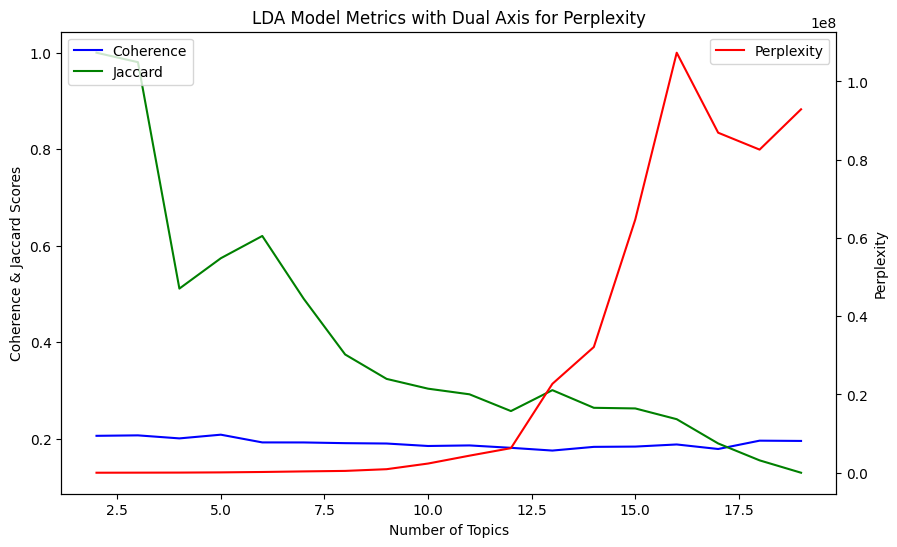

In [ ]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Coherence and Jaccard on the primary y-axis
ax1.plot(results['num_topic'], results['Coherence'], label='Coherence', color='blue')
ax1.plot(results['num_topic'], results['Jaccard'], label='Jaccard', color='green')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence & Jaccard Scores')

# Create a second y-axis for Perplexity
ax2 = ax1.twinx()
ax2.plot(results['num_topic'], results['Perplexity'], label='Perplexity', color='red')
ax2.set_ylabel('Perplexity')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('LDA Model Metrics with Dual Axis for Perplexity')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


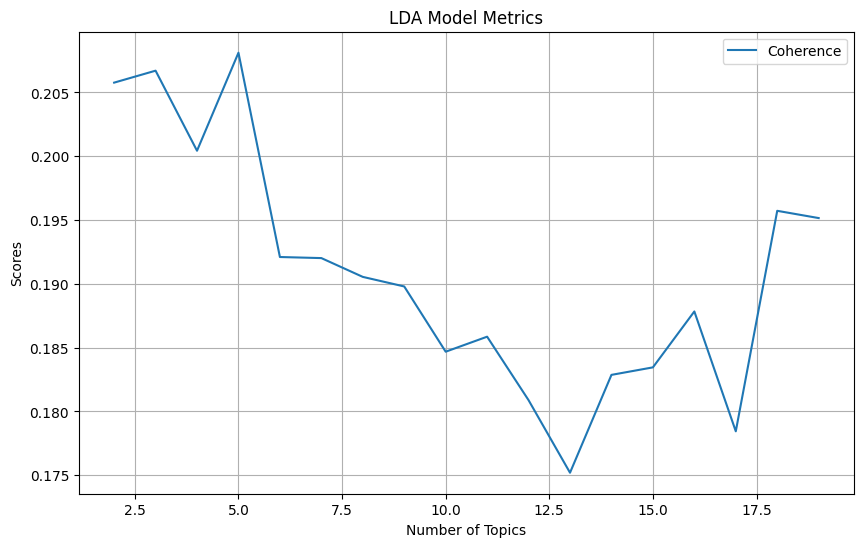

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results['num_topic'], results['Coherence'], label='Coherence')
#plt.plot(results['num_topic'], results['Jaccard'], label='Jaccard')
#plt.plot(results['num_topic'], results['Perplexity'], label='Perplexity')
plt.xlabel('Number of Topics')
plt.ylabel('Scores')
plt.title('LDA Model Metrics')
plt.grid(True)
plt.legend()
plt.show()



```
coh0 = 0
js0 = 100
ppx0 = 100
num = 1
for topic_num in range (5, 100):
  lda = decomposition.LatentDirichletAllocation (n_components=topic_num, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
  # n_components is the number of topics

  w1 = lda.fit_transform (tf_vectors)
  #h1 = lda.components_

  ppx = lda.perplexity(w1,  sub_sampling=False)

  coh = mean (metric_coherence_gensim(measure='c_v', top_n=30, topic_word_distrib=lda.components_, vocab=np.array([x for x in vectorizer_tf.vocabulary_.keys()]), texts=tok))

  l = len (lda.components_)
  n = 0
  js = 0
  for i in range(0, l-1):
    topic1 = [1 if x>1 else 0 for x in lda.components_[i]]
    for j in range(i+1, l):
      topic2 = [1 if x>1 else 0 for x in lda.components_[j]]
      js += jaccard_score (topic1, topic2)
      n += 1
  js /= n

  if js > js0 and coh < coh0 and ppx > ppx0:
    pass
  else:
    num = topic_num
    js0 = js
    coh0 = coh
    ppx0 = ppx

  print ('num_topic: ', topic_num, 'Coherence: ', coh, 'Jaccard: ', js, 'Perplexity: ', ppx)
#print ('BEST: ', 'num_topic: ', num, 'Coherence: ', coh0, 'Jaccard: ', js0, 'Perplexity: ', ppx0)
```



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
XXXXXXXXXXXXXXXXXXXXXXXXX

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'XXXXXXXXXXXXXXXXXXXXXXXXX' is not defined

# Topic Modeling

In [ ]:
import pandas as pd

def get_smallest_topic_with_max_metric(df, metric):
    # Find the max value in the metric column
    max_value = df[metric].max()

    # Filter the DataFrame for rows with this max value
    df_max_value = df[df[metric] == max_value]

    # Get the smallest 'num_topic' in these rows
    topic_num = df_max_value['num_topic'].min()

    return topic_num


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_topics = int(get_smallest_topic_with_max_metric(results, 'Coherence'))

n_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5

In [ ]:
lda = decomposition.LatentDirichletAllocation (n_components=n_topics, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
# n_components is the number of topics

w1 = lda.fit_transform (tf_vectors)
h1 = lda.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
with open(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/lda_phage_funding_{n_topics}.pk","wb") as f1:
    pickle.dump (lda, f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
lda = decomposition.LatentDirichletAllocation (n_components=n_topics, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
with open(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/lda_phage_funding_{n_topics}.pk","rb") as f1:
    lda = pickle.load (f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#pyLDAvis.enable_notebook()
#pyLDAvis.sklearn.prepare(lda, tf_vectors, vectorizer_tf, mds='tsne')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


What did I do to make this work?

I installed pyLDAvis, but didn't import it!

I went to usr/local/lib/python3.10/dist-packages/pyLDAvis/sklearn.py
and changed get_feature_names() to get_feature_names_out()

saved it!
Then imported pyLDAvis and pyLDAvis.sklearn

In [ ]:
w1 = lda.transform (tf_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
w1.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(799, 5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text = []
topic = []
probabilit = []
for i in range(len(idx)):
  text.append (str(data[idx[i]]))
  t = np.argmax (w1[i,:])
  topic.append (t)
  probabilit.append (w1[i,t])
probabilities = pd.DataFrame (data= {'Text':text,'Topic':topic,'Probability':probabilit})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Topic:','Number:')
for i in range(n_topics):
  print('topic',i,'    ',list(probabilities['Topic']).count(i))

Topic: Number:
topic 0      235
topic 1      151
topic 2      139
topic 3      1
topic 4      273


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# topic similarity matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## jaccard_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


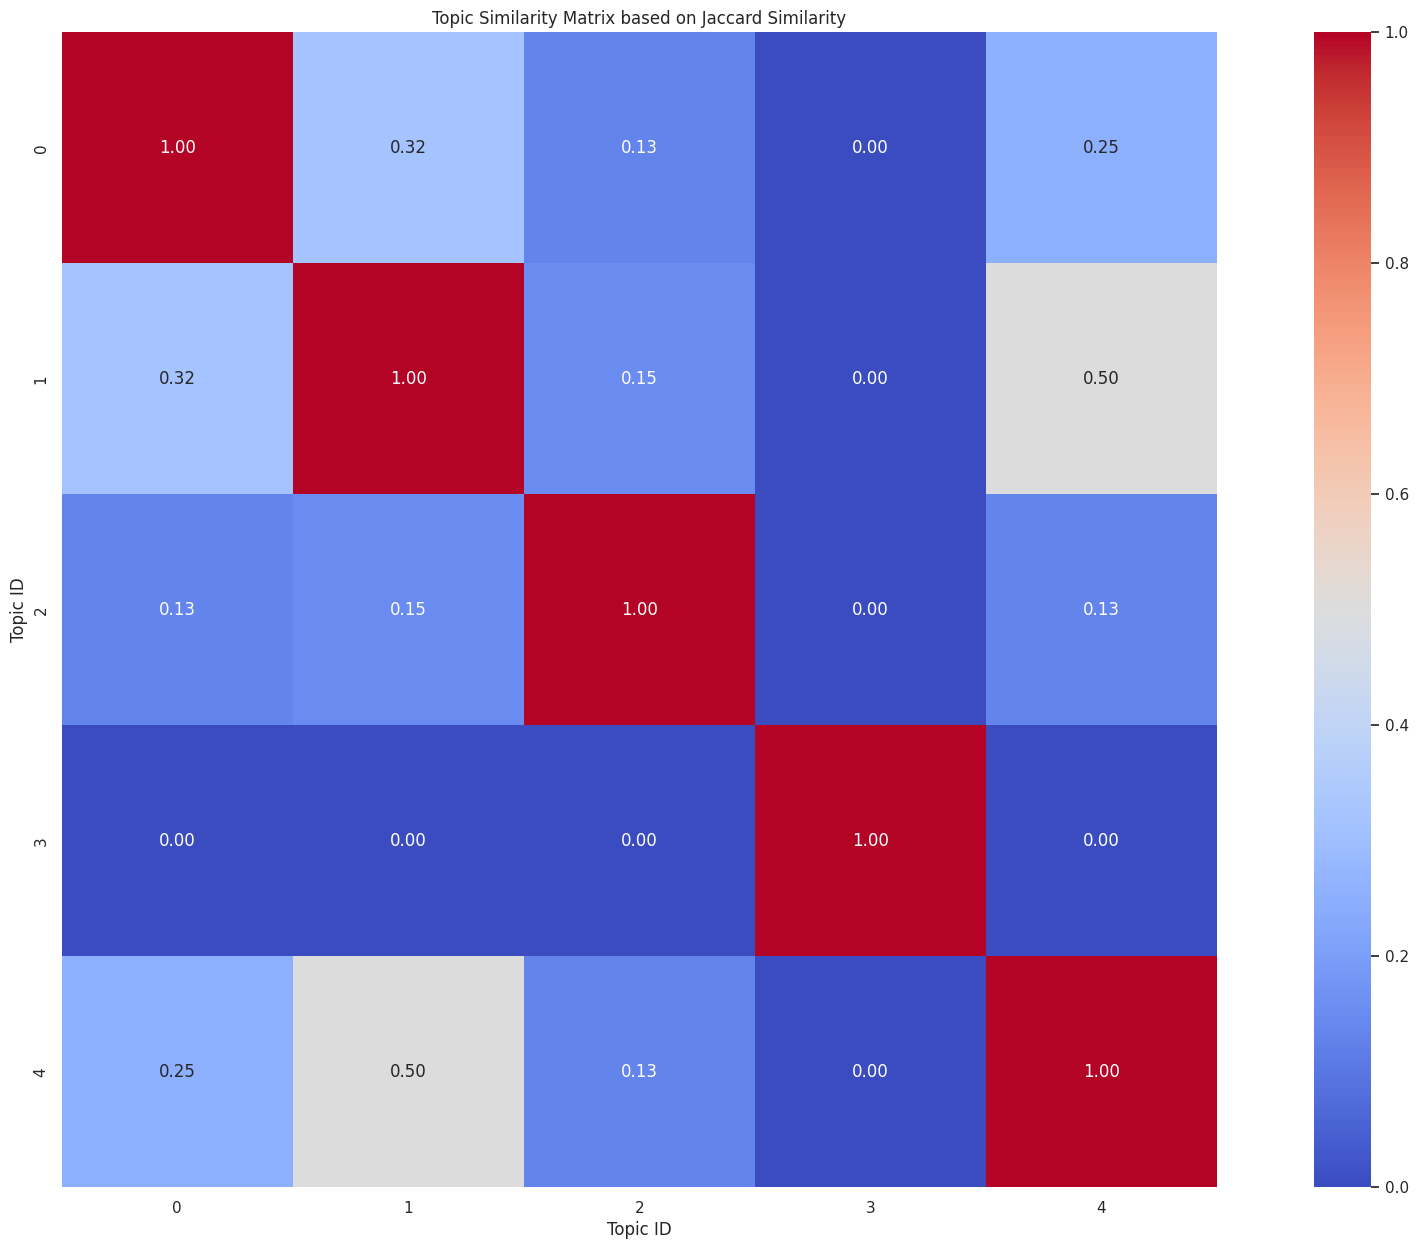

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

def jaccard_similarity(vector1, vector2, threshold=0.01):
    set1 = set(np.where(vector1 > threshold)[0])
    set2 = set(np.where(vector2 > threshold)[0])
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    if union == 0:
        return 0
    else:
        return intersection / union


# Assuming lda is your trained LDA model
# Normalize the topic-word distribution
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Number of topics
n_topics = lda.components_.shape[0]

# Create Jaccard Similarity matrix
jaccard_similarity_matrix = np.zeros((n_topics, n_topics))

for i in range(n_topics):
    for j in range(n_topics):
        jaccard_similarity_matrix[i, j] = jaccard_similarity(topic_word_distributions[i, :], topic_word_distributions[j, :], threshold=0.01)


# Plot Heatmap
plt.figure(figsize=(25, 15))
sns.set(font_scale=1)
sns.heatmap(
    jaccard_similarity_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 12}
)
plt.title("Topic Similarity Matrix based on Jaccard Similarity")
plt.xlabel("Topic ID")
plt.ylabel("Topic ID")

# Save the figure
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/topic_similarity_matrix_jaccard_phage_funding.png', dpi=600)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-118-61c1a066a49f>:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(1 - jaccard_similarity_matrix, method="average")


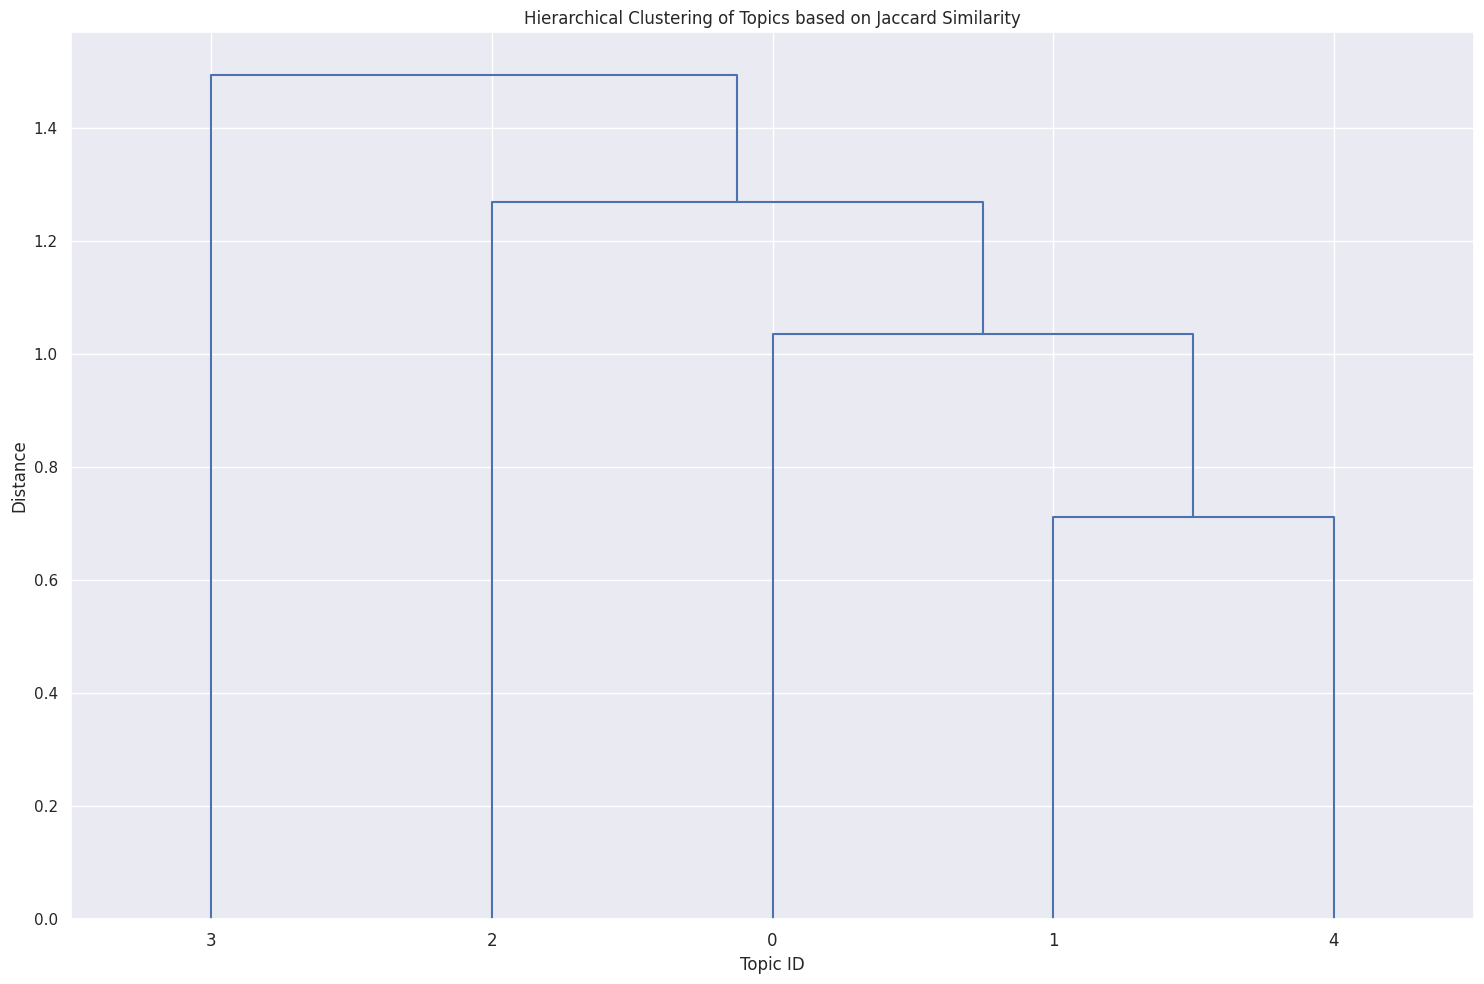

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import LatentDirichletAllocation

# Define Jaccard Similarity function
def jaccard_similarity(vector1, vector2, threshold=0.01):
    set1 = set(np.where(vector1 > threshold)[0])
    set2 = set(np.where(vector2 > threshold)[0])
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    if union == 0:
        return 0
    else:
        return intersection / union


# Assuming lda is your trained LDA model
n_topics = lda.components_.shape[0]
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Create Jaccard Similarity matrix
jaccard_similarity_matrix = np.zeros((n_topics, n_topics))

for i in range(n_topics):
    for j in range(n_topics):
        jaccard_similarity_matrix[i, j] = jaccard_similarity(topic_word_distributions[i, :], topic_word_distributions[j, :], threshold=0.01)

# Perform hierarchical clustering
linkage_matrix = linkage(1 - jaccard_similarity_matrix, method="average")

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, color_threshold=0.5)
plt.title("Hierarchical Clustering of Topics based on Jaccard Similarity")
plt.xlabel("Topic ID")
plt.ylabel("Distance")
plt.tight_layout()

# Save the figure in high resolution
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/topic_clustering_dendrogram_jaccard_phage_funding.png', dpi=600)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# get_top_keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_top_keywords(lda_model, vectorizer, n_words=50):
    terms = vectorizer.get_feature_names_out()
    topic_keywords = []

    for topic_idx, topic in enumerate(lda.components_):
        top_keywords_idx = topic.argsort()[::-1][:n_words]
        top_keywords = [(terms[i], topic[i]) for i in top_keywords_idx]
        topic_keywords.append(top_keywords)

    return topic_keywords

top_keywords = get_top_keywords(lda, vectorizer_tf, n_words=50)

# To display the topics with their keywords and scores
with open(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/top_keywords_phage_funding.txt", "w") as f:
    for idx, keywords in enumerate(top_keywords):
        f.write(f"Topic {idx}:\n")
        print(f"Topic {idx}:")
        for word, score in keywords:
            f.write(f"{word}, ")
            print(f"{word}", end=", ")
        f.write("\n\n")
        print("\n")

Topic 0:
bacteria, bacterial, bacteriophage, host, gene, infection, resistance, antibiotic, system, protein, cell, study, mechanism, research, genetic, genome, interaction, resistant, strain, virus, therapy, project, infect, understand, specific, molecular, disease, human, activity, different, biology, treatment, process, lytic, role, potential, provide, identify, develop, therapeutic, target, important, analysis, antibacterial, control, expression, work, environment, antimicrobial, evolution, 

Topic 1:
infection, resistance, antibiotic, biofilm, clinical, model, therapy, bacteriophage, treatment, therapeutic, bacterial, study, resistant, bacteria, disease, lytic, development, research, patient, mouse, test, method, enzyme, host, aim, base, strain, immune, efficacy, human, testing, datum, activity, isolate, develop, vaccine, vivo, prevent, project, time, result, staphylococcus, anti, system, health, effect, animal, antimicrobial, response, cell, 

Topic 2:
cell, peptide, cancer, antib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Emergent topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


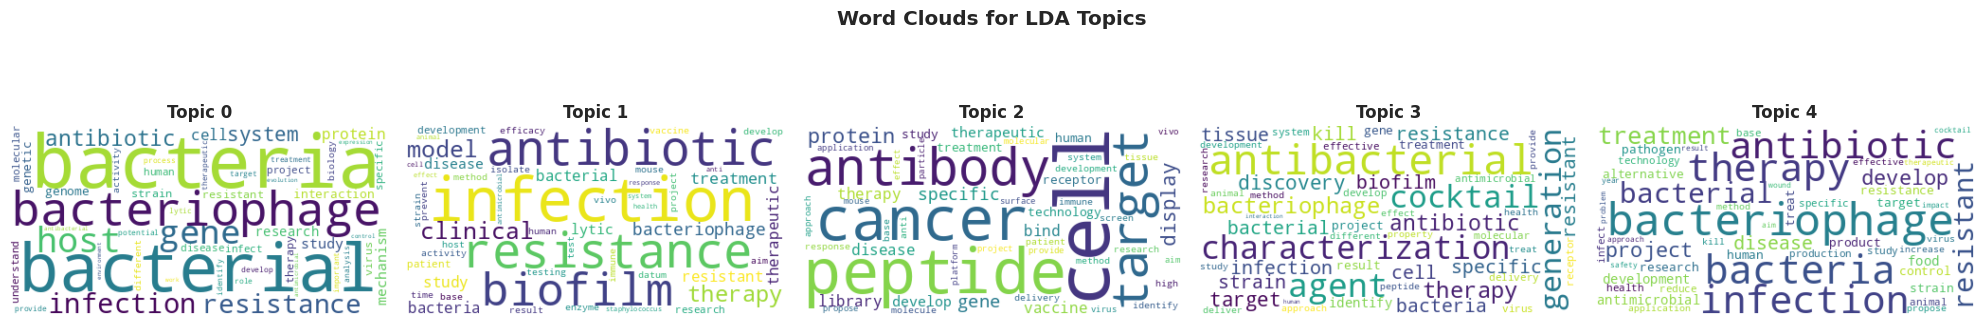

In [ ]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

# Word Clouds for topics
def plot_wordcloud(lda, topic_id, ax, n_words=50):
    terms = vectorizer_tf.get_feature_names_out()
    word_probs = {terms[i]: prob for i, prob in enumerate(lda.components_[topic_id])}
    wc = WordCloud(background_color='white', max_words=n_words).generate_from_frequencies(word_probs)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Topic {topic_id}", fontweight='bold')  # Bold title for each subplot

# Assuming n_topics to be the number of topics you've chosen
n_topics = n_topics  # Make sure this matches the number of topics in lda_model

# Calculate the number of rows needed
n_rows = int(np.ceil(n_topics / 5))

fig, axes = plt.subplots(n_rows, 5, figsize=(20, 4 * n_rows))

# Flatten the array and truncate it to match the number of topics
axes_flat = axes.flatten()[:n_topics]

for ax, topic_id in zip(axes_flat, range(n_topics)):
    plot_wordcloud(lda, topic_id, ax)

# Remove extra subplots
for idx in range(n_topics, len(axes.flatten())):
    fig.delaxes(axes.flatten()[idx])

plt.suptitle("Word Clouds for LDA Topics", fontweight='bold')  # Bold main title
plt.tight_layout()
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/wordclouds_phage_funding.png', dpi=600)  # Use raw string for path
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Attach Discovered Topic Labels to Original scholar publications

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
final_topics = lda.transform(tf_vectors)
final_topics.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(799, 5)

In [ ]:
df_filtered["Topic N°"] = final_topics.argmax(axis=1)
df_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rank      Grant Number(s)  \
Grant ID      Publication Year                              
grant.7444531 2018              1097               104205   
grant.6256045 1988              1021             63550391   
grant.6076691 2011              1091             23925015   
grant.8683185 2019              1895  2018/31/B/NZ6/03999   
grant.9333780 2020              1124  2019/35/B/NZ7/01824   

                                                                            Title  \
Grant ID      Publication Year                                                      
grant.7444531 2018              Development of Manufacturing Process of Engine...   
grant.6256045 1988                             下水処理施設内におけるコリファージの不活性化に関する調査及び実験研究   
grant.6076691 2011                                  病原細菌溶菌バクテリオファージを用いた安全なコンポスト生産   
grant.8683185 2019              Immunomodulacyjny wpływ bakteriofagów na funkc...   
grant.9333780 2020              PhageScan: identyfikacja epitopów bakteriofago...   

                                                                 Title translated  \
Grant ID      Publication Year                                                      
grant.7444531 2018              Development of Manufacturing Process of Engine...   
grant.6256045 1988              Research and experimental study on the inactiv...   
grant.6076691 2011              Safe compost production using pathogenic bacte...   
grant.8683185 2019              Immunomodulatory effect of bacteriophages on t...   
grant.9333780 2020              PhageScan: identification of bacteriophage epi...   

                                                                         Abstract  \
Grant ID      Publication Year                                                      
grant.7444531 2018              "Phico is a biotechnology company developing a...   
grant.6256045 1988              (1)活性汚泥処理において、最終沈澱池越流水までの年平均除去率は大腸菌群、腸球菌およびコリフ...   
grant.6076691 2011              【目的】バクテリオファージ(以下ファージ)は細菌に感染するウイルスであり、種類によって宿主と...   
grant.8683185 2019              1 Bakteriofagi (fagi) to wirusy, które są w st...   
grant.9333780 2020              1 Ciało człowieka jest zasiedlane przez skompl...   

                                                              Abstract translated  \
Grant ID      Publication Year                                                      
grant.7444531 2018              "Phico is a biotechnology company developing a...   
grant.6256045 1988              (1) In the activated sludge process, the final...   
grant.6076691 2011              [Purpose] bacteriophage (phage below) is a vir...   
grant.8683185 2019              1\n \nBacteriophages (phages) are viruses that...   
grant.9333780 2020              1 The human body is inhabited by complex “comm...   

                                                                         Keywords  \
Grant ID      Publication Year                                                      
grant.7444531 2018                                                            NaN   
grant.6256045 1988              Watering filter bed; Activated sludge; Inactiv...   
grant.6076691 2011                             Salmonella; Bacteriophage; compost   
grant.8683185 2019                                                            NaN   
grant.9333780 2020              microbiome; phages; phage therapy; phageom; ba...   

                               Unnamed: 8  includes ?  Funding amount  \
Grant ID      Publication Year                                          
grant.7444531 2018                      ,           1         1390139   
grant.6256045 1988                      ,           1         2300000   
grant.6076691 2011                      ,           1          600000   
grant.8683185 2019                      ,           1         1499000   
grant.9333780 2020                      ,           1         2361600   

                               Currency  Funding amount in USD  Start date  \
Grant ID      Publication Year    

In [ ]:
# Save data to CSV and Pickle formats
df_filtered.to_csv(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/topic_probability_phage_funding.csv', index=False)
df_filtered.to_pickle(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/topic_probability_phage_funding.pkl')

df_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rank      Grant Number(s)  \
Grant ID      Publication Year                              
grant.7444531 2018              1097               104205   
grant.6256045 1988              1021             63550391   
grant.6076691 2011              1091             23925015   
grant.8683185 2019              1895  2018/31/B/NZ6/03999   
grant.9333780 2020              1124  2019/35/B/NZ7/01824   

                                                                            Title  \
Grant ID      Publication Year                                                      
grant.7444531 2018              Development of Manufacturing Process of Engine...   
grant.6256045 1988                             下水処理施設内におけるコリファージの不活性化に関する調査及び実験研究   
grant.6076691 2011                                  病原細菌溶菌バクテリオファージを用いた安全なコンポスト生産   
grant.8683185 2019              Immunomodulacyjny wpływ bakteriofagów na funkc...   
grant.9333780 2020              PhageScan: identyfikacja epitopów bakteriofago...   

                                                                 Title translated  \
Grant ID      Publication Year                                                      
grant.7444531 2018              Development of Manufacturing Process of Engine...   
grant.6256045 1988              Research and experimental study on the inactiv...   
grant.6076691 2011              Safe compost production using pathogenic bacte...   
grant.8683185 2019              Immunomodulatory effect of bacteriophages on t...   
grant.9333780 2020              PhageScan: identification of bacteriophage epi...   

                                                                         Abstract  \
Grant ID      Publication Year                                                      
grant.7444531 2018              "Phico is a biotechnology company developing a...   
grant.6256045 1988              (1)活性汚泥処理において、最終沈澱池越流水までの年平均除去率は大腸菌群、腸球菌およびコリフ...   
grant.6076691 2011              【目的】バクテリオファージ(以下ファージ)は細菌に感染するウイルスであり、種類によって宿主と...   
grant.8683185 2019              1 Bakteriofagi (fagi) to wirusy, które są w st...   
grant.9333780 2020              1 Ciało człowieka jest zasiedlane przez skompl...   

                                                              Abstract translated  \
Grant ID      Publication Year                                                      
grant.7444531 2018              "Phico is a biotechnology company developing a...   
grant.6256045 1988              (1) In the activated sludge process, the final...   
grant.6076691 2011              [Purpose] bacteriophage (phage below) is a vir...   
grant.8683185 2019              1\n \nBacteriophages (phages) are viruses that...   
grant.9333780 2020              1 The human body is inhabited by complex “comm...   

                                                                         Keywords  \
Grant ID      Publication Year                                                      
grant.7444531 2018                                                            NaN   
grant.6256045 1988              Watering filter bed; Activated sludge; Inactiv...   
grant.6076691 2011                             Salmonella; Bacteriophage; compost   
grant.8683185 2019                                                            NaN   
grant.9333780 2020              microbiome; phages; phage therapy; phageom; ba...   

                               Unnamed: 8  includes ?  Funding amount  \
Grant ID      Publication Year                                          
grant.7444531 2018                      ,           1         1390139   
grant.6256045 1988                      ,           1         2300000   
grant.6076691 2011                      ,           1          600000   
grant.8683185 2019                      ,           1         1499000   
grant.9333780 2020                      ,           1         2361600   

                               Currency  Funding amount in USD  Start date  \
Grant ID      Publication Year    

In [ ]:
df_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rank      Grant Number(s)  \
Grant ID       Publication Year                              
grant.7444531  2018              1097               104205   
grant.6256045  1988              1021             63550391   
grant.6076691  2011              1091             23925015   
grant.8683185  2019              1895  2018/31/B/NZ6/03999   
grant.9333780  2020              1124  2019/35/B/NZ7/01824   
...                               ...                  ...   
grant.9955917  2021               818               21-048   
grant.6581678  2016               741           OPP1150209   
grant.13582208 2023               821            01KI2302C   
grant.13816981 2023              1181             01QE2310   
grant.7389861  2017               900           OPP1173800   

                                                                             Title  \
Grant ID       Publication Year                                                      
grant.7444531  2018              Development of Manufacturing Process of Engine...   
grant.6256045  1988                             下水処理施設内におけるコリファージの不活性化に関する調査及び実験研究   
grant.6076691  2011                                  病原細菌溶菌バクテリオファージを用いた安全なコンポスト生産   
grant.8683185  2019              Immunomodulacyjny wpływ bakteriofagów na funkc...   
grant.9333780  2020              PhageScan: identyfikacja epitopów bakteriofago...   
...                                                                            ...   
grant.9955917  2021              2021 NW(Dartmouth)Virtual Resident Research Sy...   
grant.6581678  2016              To improve the safety and efficacy of phage – ...   
grant.13582208 2023              Kleopatra: Entwurf und Umsetzung einer wirksam...   
grant.13816981 2023              Verbundprojekt: Die nächste Generation von Pha...   
grant.7389861  2017              To train East African scientists to isolate an...   

                                                                  Title translated  \
Grant ID       Publication Year                                                      
grant.7444531  2018              Development of Manufacturing Process of Engine...   
grant.6256045  1988              Research and experimental study on the inactiv...   
grant.6076691  2011              Safe compost production using pathogenic bacte...   
grant.8683185  2019              Immunomodulatory effect of bacteriophages on t...   
grant.9333780  2020              PhageScan: identification of bacteriophage epi...   
...                                                                            ...   
grant.9955917  2021              2021 NW(Dartmouth)Virtual Resident Research Sy...   
grant.6581678  2016              To improve the safety and efficacy of phage – ...   
grant.13582208 2023              Kleopatra: Design and implementation of an eff...   
grant.13816981 2023              Collaborative project: The next generation of ...   
grant.7389861  2017              To train East African scientists to isolate an...   

                                                                          Abstract  \
Grant ID       Publication Year                                                      
grant.7444531  2018              "Phico is a biotechnology company developing a...   
grant.6256045  1988              (1)活性汚泥処理において、最終沈澱池越流水までの年平均除去率は大腸菌群、腸球菌およびコリフ...   
grant.6076691  2011              【目的】バクテリオファージ(以下ファージ)は細菌に感染するウイルスであり、種類によって宿主と...   
grant.8683185  2019              1 Bakteriofagi (fagi) to wirusy, które są w st...   
grant.9333780  2020              1 Ciało człowieka jest zasiedlane przez skompl...   
...                                                                            ...   
grant.9955917  2021                                                            NaN   
grant.6581678  2016                                                            NaN   
grant.13582208 2023                                                            NaN   
grant.13816981 2023                       

In [ ]:
df_filtered['Topic N°'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4    273
0    235
1    151
2    139
3      1
Name: Topic N°, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Frequency Counting

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 1: Group data by 'Publication Year' and 'topic', then count occurrences
topic_counts_by_year = df_filtered.reset_index().groupby(['Publication Year', 'Topic N°']).size().unstack(fill_value=0)

# Step 2: Calculate the total count of each topic
total_counts = topic_counts_by_year.sum()

# Step 3: Sort columns by total count
sorted_columns = total_counts.sort_values(ascending=False).index
topic_counts_by_year = topic_counts_by_year[sorted_columns]

# Step 4: Add a row with the total count of each topic
topic_counts_by_year.loc['Total'] = total_counts.loc[sorted_columns]

# Save the DataFrame to CSV and pickle files
topic_counts_by_year.to_csv(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/topic_counts_by_year_phage_funding.csv')
topic_counts_by_year.to_pickle(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/topic_counts_by_year_phage_funding.pkl')

# This will give you a DataFrame where each row is a year (plus a 'Total' row at the bottom),
# and each column is the count of documents associated with a topic for that year (and the total count).

# Display the updated DataFrame
topic_counts_by_year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Topic N°            4    0    1    2  3
Publication Year                       
1978                0    1    0    0  0
1987                0    1    0    0  0
1988                1    0    1    0  0
1989                0    1    0    0  0
1995                0    0    0    1  0
1996                0    1    0    2  0
1997                0    0    0    2  0
1998                0    0    0    2  0
1999                0    1    1    3  0
2000                6    3    0    9  0
2001                1    3    0    4  0
2002                0    2    0    3  0
2003                1    4    1    3  0
2004                3    0    2    2  0
2005                2    2    0    2  0
2006                4    1    3    2  0
2007                6    2    0    4  0
2008                5    5    1    5  0
2009                4    7    1   14  0
2010                7    6    5    2  0
2011               10   13    4    7  0
2012                4    9    3    9  0
2013                7    5    2    5  0
2014                9    9    4    5  0
2015               11   11   16    8  0
2016               14   20    9    4  0
2017               20   12    5    6  0
2018               27   21   10    5  0
2019               22   27   17    5  0
2020               25   15   16    9  1
2021               35   23   19    5  0
2022               33   15   15    7  0
2023               16   14   16    4  0
2024                0    1    0    0  0
Total             273  235  151  139  1

In [ ]:
topic_counts_by_year.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(35, 5)

In [ ]:
# Evolution Curve for Each Topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


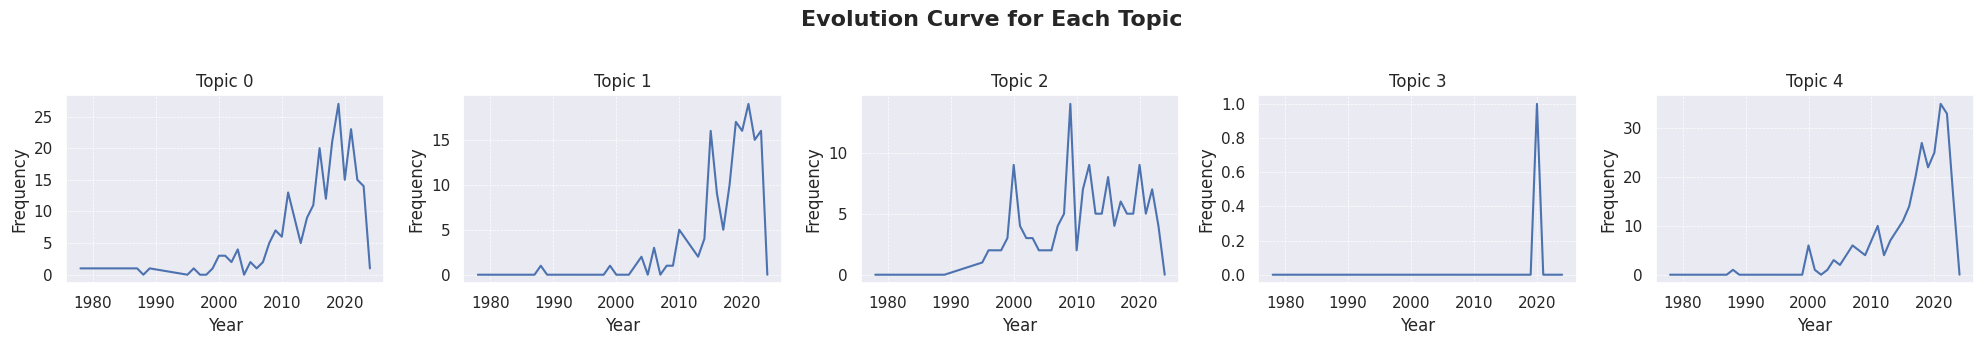

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the DataFrame from the CSV file (assuming it's stored as 'topic_counts_by_year.csv')
# Replace this line with your actual data if it's not in a CSV
#topic_counts_by_year = pd.read_csv('topic_counts_by_year.csv', index_col='Publication Year')

# Remove the 'Total' row if it exists
if 'Total' in topic_counts_by_year.index:
    topic_counts_by_year = topic_counts_by_year.drop(index=['Total'])

# Sort columns by topic name
topic_counts_by_year = topic_counts_by_year.sort_index(axis=1)

# Define the number of topics (make sure this matches your data)
n_topics = len(topic_counts_by_year.columns)

# Calculate the number of rows needed for subplots
n_rows = (n_topics + 4) // 5  # +4 for rounding up

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, 5, figsize=(20, n_rows * 3.5))

# Flatten the array to easily iterate over it
axes_flat = axes.flatten()

# Loop through each topic and plot its curve on a separate subplot
for i, topic in enumerate(topic_counts_by_year.columns):
    axes_flat[i].plot(
        topic_counts_by_year.index,
        topic_counts_by_year[topic]
    )
    axes_flat[i].set_title(f'Topic {topic}')
    axes_flat[i].set_xlabel('Year')
    axes_flat[i].set_ylabel('Frequency')
    axes_flat[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Remove extra subplots
for i in range(n_topics, len(axes_flat)):
    fig.delaxes(axes_flat[i])

# Add a main title for the entire figure
fig.suptitle('Evolution Curve for Each Topic', fontsize=16, fontweight='bold')

# Save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.savefig(f'/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/topic_evolution_curves_subplot_ordered_phage_funding.png', dpi=600)

# Show the figure
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Temporal Heatmaps: Display how topic proportions change over time.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


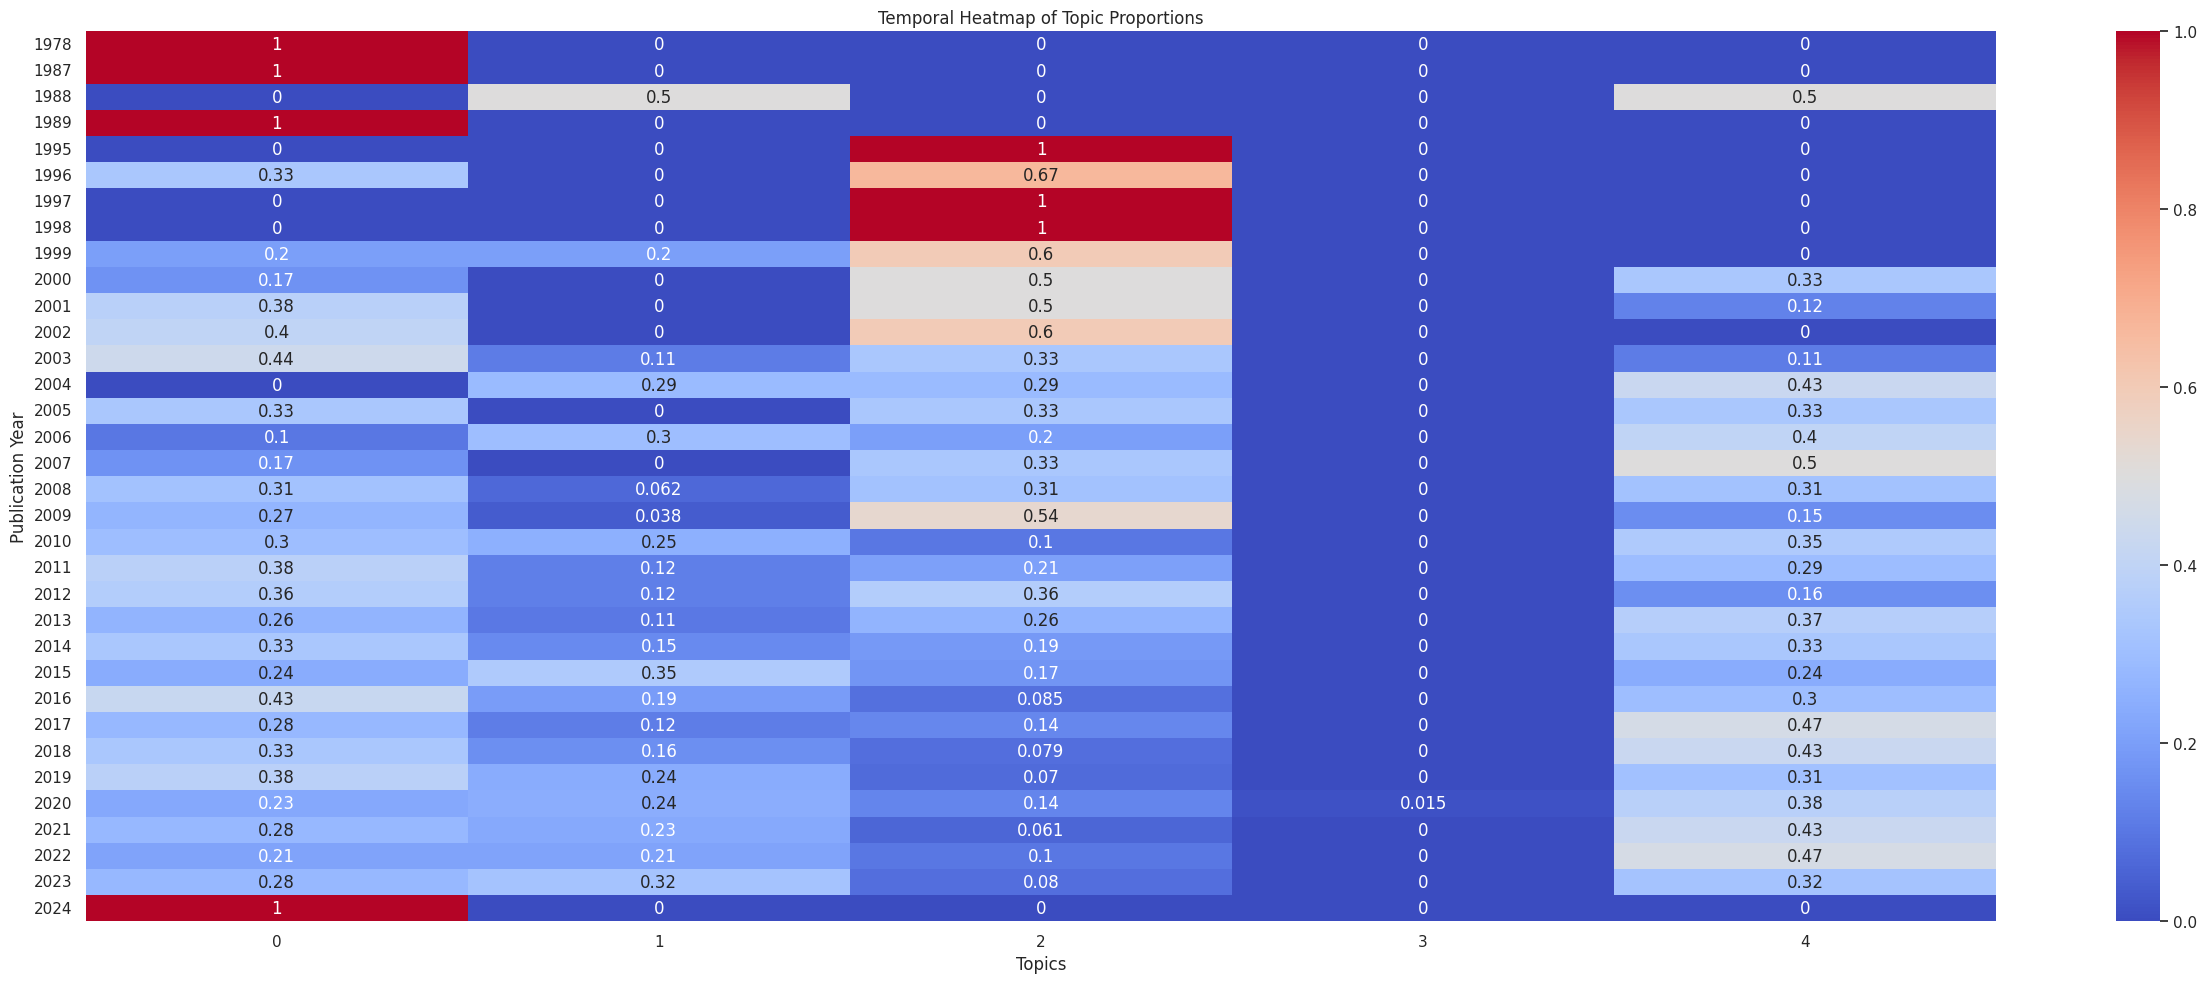

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assume you already have topic_counts_by_year DataFrame

# Remove the 'Total' row if it exists
if 'Total' in topic_counts_by_year.index:
    topic_counts_by_year = topic_counts_by_year.drop(index=['Total'])

# Sort columns by topic name
topic_counts_by_year = topic_counts_by_year.sort_index(axis=1)

# Calculate the total count for each year (row-wise sum)
total_counts_by_year = topic_counts_by_year.sum(axis=1)

# Normalize frequencies to get proportions
proportions_by_year = topic_counts_by_year.divide(total_counts_by_year, axis=0)

# Create the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(proportions_by_year.fillna(0), annot=True, cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)

# Add labels and title
plt.title('Temporal Heatmap of Topic Proportions')
plt.xlabel('Topics')
plt.ylabel('Publication Year')

# Save the figure
plt.tight_layout()
plt.savefig(f"/content/drive/Othercomputers/My laptop/D:/PROJECT/YORK UNIVERSITY/phage funding/data_preprocesse/temporal_heatmap_topic_proportions_phage_funding.png")  # Save the plot to a PNG file

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
